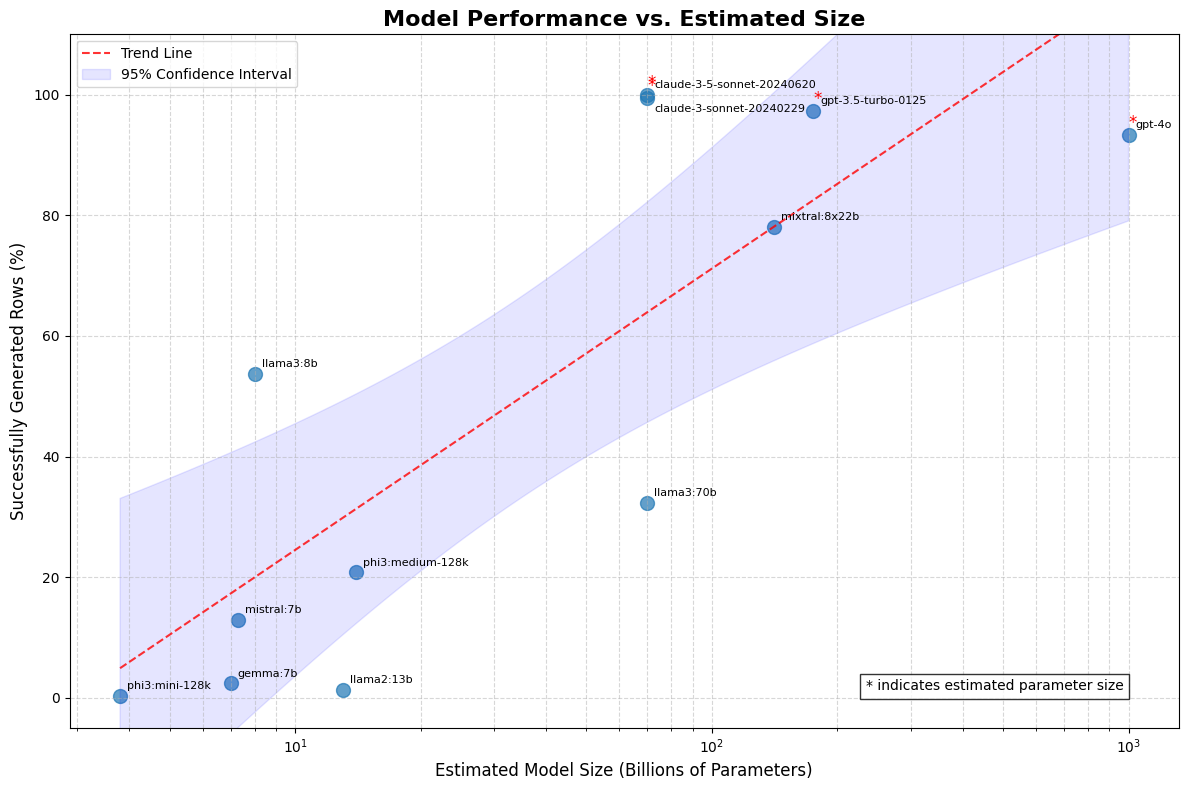

Figure saved as 'model_performance_vs_parameter_size.png'


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

# Model sizes in billions of parameters (approximations based on available information)
model_sizes = {
    "claude-3-5-sonnet-20240620": 70,   # Based on Claude 3 Sonnet estimation
    "claude-3-sonnet-20240229": 70,     # Not officially disclosed, note in figure: https://lifearchitect.substack.com/p/the-memo-special-edition-claude-3
    "gemma:7b": 7,                      # https://huggingface.co/google/gemma-7b
    "gpt-3.5-turbo-0125": 175,          # Not officially disclosed, note in figure: https://lifearchitect.ai/chatgpt/ (Estimated)
    "gpt-4o": 1000,                     # Not officially disclosed, note in figure: https://gettalkative.com/info/gpt-4-vs-gpt-3-5 (Estimated)
    "llama2:13b": 13,                   # https://huggingface.co/meta-llama/Llama-2-13b
    "llama3:8b": 8,                     # https://huggingface.co/meta-llama/Meta-Llama-3-70B
    "llama3:70b": 70,                   # https://huggingface.co/meta-llama/Meta-Llama-3-70B
    "mistral:7b": 7.3,                  # https://mistral.ai/news/announcing-mistral-7b/
    "mixtral:8x22b": 141,               # https://mistral.ai/news/mixtral-8x22b/
    "phi3:medium-128k": 14,             # https://huggingface.co/microsoft/Phi-3-medium-128k-instruct
    "phi3:mini-128k": 3.8,              # https://huggingface.co/microsoft/Phi-3-mini-128k-instruct
}

# Load data from csv
successfully_generated_samples = pd.read_csv('model_successfully_gen_samples_median_norm.csv')
model_names =  successfully_generated_samples['model'].values
success_rates =  successfully_generated_samples['successfully_generated_samples_median_normalized'].values

# # Data from the provided results
# model_names = [
#     "claude-3-5-sonnet-20240620","claude-3-sonnet-20240229", "gpt-4o", "gpt-3.5-turbo-0125", "llama3:8b",
#     "llama3:70b", "phi3:medium-128k", "mistral:7b", "mixtral:8x22b","gemma:7b", "llama2:13b", "phi3:mini-128k"
# ]

# # Success rates
# success_rates = [
#     1.000000, 0.994667, 0.933333, 0.973333, 0.537333,
#     0.322667, 0.208000, 0.129333, 0.780000, 0.024000, 0.013333, 0.002667
# ]

# Create lists for plotting
x = np.array([model_sizes[name] for name in model_names])
y = np.array([rate * 100 for rate in success_rates])  # Convert to percentage

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=100, alpha=0.7)

# Add labels for each point
for i, name in enumerate(model_names):
    if name == 'claude-3-sonnet-20240229':
        plt.annotate(name, (x[i], y[i]), xytext=(5, -10), textcoords='offset points', fontsize=8)
    else:
        plt.annotate(name, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Set log scale for x-axis
plt.xscale('log')

# Customize the plot
plt.title("Model Performance vs. Estimated Size", fontsize=16, fontweight='bold')
plt.xlabel("Estimated Model Size (Billions of Parameters)", fontsize=12)
plt.ylabel("Successfully Generated Rows (%)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.ylim([-5, 110])

# Add a trend line and confidence interval
log_x = np.log10(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, y)

def predict(x):
    return slope * np.log10(x) + intercept

x_pred = np.logspace(np.log10(x.min()), np.log10(x.max()), 100)
y_pred = predict(x_pred)

plt.plot(x_pred, y_pred, "r--", alpha=0.8, label="Trend Line")

# Calculate confidence interval
pi = 0.95
n = len(x)
se = np.sqrt(np.sum((y - predict(x))**2) / (n-2)) * np.sqrt(1/n + (np.log10(x_pred) - np.mean(log_x))**2 / np.sum((log_x - np.mean(log_x))**2))
t_value = stats.t.ppf((1 + pi) / 2, n - 2)
ci = t_value * se

# Plot confidence interval
plt.fill_between(x_pred, y_pred - ci, y_pred + ci, color='b', alpha=0.1, label='95% Confidence Interval')

# Highlight the estimated models
for i, name in enumerate(model_names):
    if name in ["claude-3-5-sonnet-20240620", "claude-3-sonnet-20240229", "gpt-3.5-turbo-0125", "gpt-4o"]:
        plt.annotate("*", (x[i], y[i]), xytext=(0, 5), textcoords='offset points', fontsize=12, color='red')

# Add a footnote box
plt.text(0.95, 0.05, '* indicates estimated parameter size', 
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,
         color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.legend(loc='upper left')
plt.tight_layout()

# Save the figure
plt.savefig("./images/model_performance_vs_parameter_size.png", dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'model_performance_vs_parameter_size.png'")


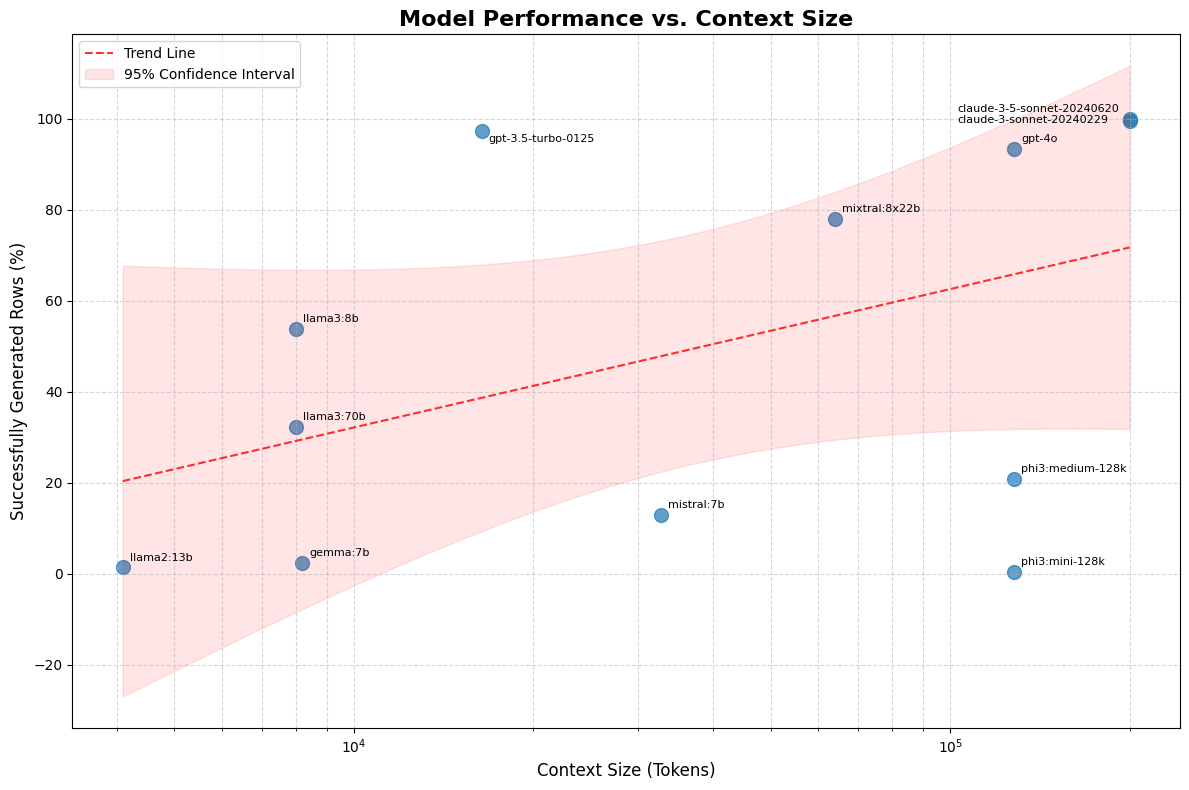

Figure saved as 'model_performance_vs_context_length.png'


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Context window lengths (in tokens)
context_lengths = {
    "claude-3-5-sonnet-20240620": 200000,   # https://docs.anthropic.com/en/docs/about-claude/models
    "claude-3-sonnet-20240229": 200000,     # https://docs.anthropic.com/en/docs/about-claude/models
    "gpt-4o": 128000,                       # https://platform.openai.com/docs/models/gpt-4o
    "gpt-3.5-turbo-0125": 16385,            # https://platform.openai.com/docs/models/gpt-3-5-turbo
    "llama2:13b": 4096,                     # https://huggingface.co/meta-llama/Llama-2-13b
    "llama3:8b": 8000,                      # https://huggingface.co/meta-llama/Meta-Llama-3-8B
    "llama3:70b": 8000,                     # https://huggingface.co/meta-llama/Meta-Llama-3-8B
    "phi3:medium-128k": 128000,             # https://huggingface.co/microsoft/Phi-3-medium-128k-instruct
    "phi3:mini-128k": 128000,               # https://huggingface.co/microsoft/phi-3-mini
    "mistral:7b": 32768,                    # https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2
    "mixtral:8x22b": 64000,                 # https://mistral.ai/news/mixtral-8x22b/
    "gemma:7b": 8192,                       # https://huggingface.co/google/gemma-7b
}


# Load data from csv
successfully_generated_samples = pd.read_csv('model_successfully_gen_samples_median_norm.csv')
model_names =  successfully_generated_samples['model'].values
success_rates =  successfully_generated_samples['successfully_generated_samples_median_normalized'].values

# # Data from the provided results
# model_names = [
#     "claude-3-5-sonnet-20240620","claude-3-sonnet-20240229", "gpt-4o", "gpt-3.5-turbo-0125", "llama3:8b",
#     "llama3:70b", "phi3:medium-128k", "mistral:7b", "mixtral:8x22b","gemma:7b", "llama2:13b", "phi3:mini-128k"
# ]

# # Success rates
# success_rates = [
#     1.000000, 0.994667, 0.933333, 0.973333, 0.537333,
#     0.322667, 0.208000, 0.129333, 0.780000, 0.024000, 0.013333, 0.002667
# ]

# Create lists for plotting
x = [context_lengths[name] for name in model_names]
y = [rate * 100 for rate in success_rates]  # Convert to percentage

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=100, alpha=0.7)

# Add labels for each point
for i, name in enumerate(model_names):
    if name == 'gpt-3.5-turbo-0125':
        plt.annotate(name, (x[i], y[i] - 4), xytext=(5, 5), textcoords='offset points', fontsize=8)
    elif name == 'claude-3-sonnet-20240229':
        plt.annotate(name, (x[i] - 10e4, y[i] - 2), xytext=(5, 5), textcoords='offset points', fontsize=8)
    elif name == 'claude-3-5-sonnet-20240620':
        plt.annotate(name, (x[i] - 10e4, y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)
    else:
        plt.annotate(name, (x[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

# Set log scale for x-axis
plt.xscale('log')

# Customize the plot
plt.title("Model Performance vs. Context Size", fontsize=16, fontweight='bold')
plt.xlabel("Context Size (Tokens)", fontsize=12)
plt.ylabel("Successfully Generated Rows (%)", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Add a trend line and confidence interval
log_x = np.log10(x)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, y)

def predict(x):
    return slope * np.log10(x) + intercept

x_pred = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
y_pred = predict(x_pred)

plt.plot(x_pred, y_pred, "r--", alpha=0.8, label="Trend Line")

# Calculate confidence interval
pi = 0.95
n = len(x)
se = np.sqrt(np.sum((y - predict(x))**2) / (n-2)) * np.sqrt(1/n + (np.log10(x_pred) - np.mean(log_x))**2 / np.sum((log_x - np.mean(log_x))**2))
t_value = stats.t.ppf((1 + pi) / 2, n - 2)
ci = t_value * se

# Plot confidence interval
plt.fill_between(x_pred, y_pred - ci, y_pred + ci, color='r', alpha=0.1, label='95% Confidence Interval')

plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("./images/model_performance_vs_context_length.png", dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved as 'model_performance_vs_context_length.png'")